In [31]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [32]:
query = """
SELECT restaurant_order.datetime, restaurant_product.name, restaurant_product.price, restaurant_orderitem.quantity
FROM restaurant_order
JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
"""
with sqlite3.connect("../db.sqlite3") as conn:
    data = pd.read_sql_query(query, conn)
    data.to_csv("restaurant.csv")
    
data = pd.read_csv("restaurant.csv", index_col=0)
data["datetime"] = pd.to_datetime(data["datetime"])
data["item_price"] = data["price"] * data["quantity"]
data.count()

datetime      74818
name          74818
price         74818
quantity      74818
item_price    74818
dtype: int64

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

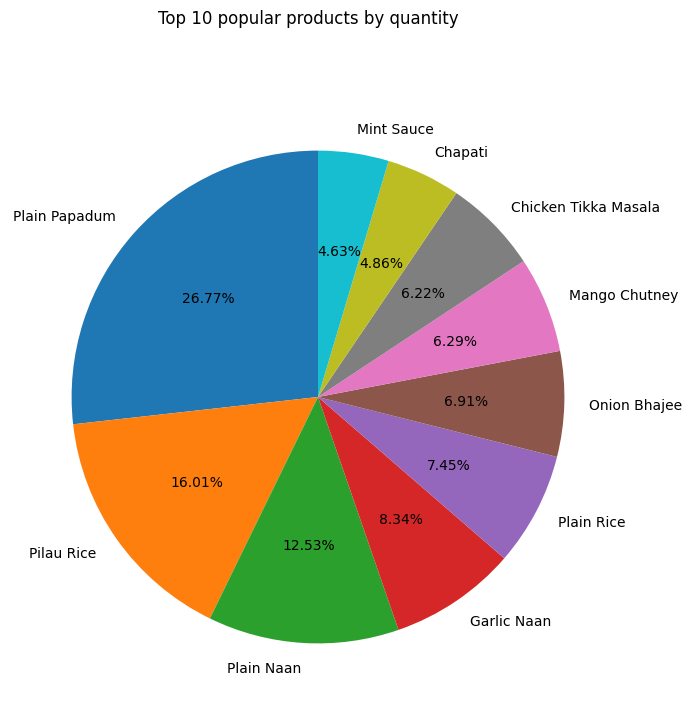

In [33]:
popular = data.groupby("name")["quantity"].sum().nlargest(10).reset_index()
popular["percentages"] = 100 * popular["quantity"] / popular["quantity"].sum()

plt.figure(figsize=(8, 8))
plt.pie(popular["percentages"], labels=popular["name"], autopct=f"%1.2f%%", startangle=90)
plt.suptitle("Top 10 popular products by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

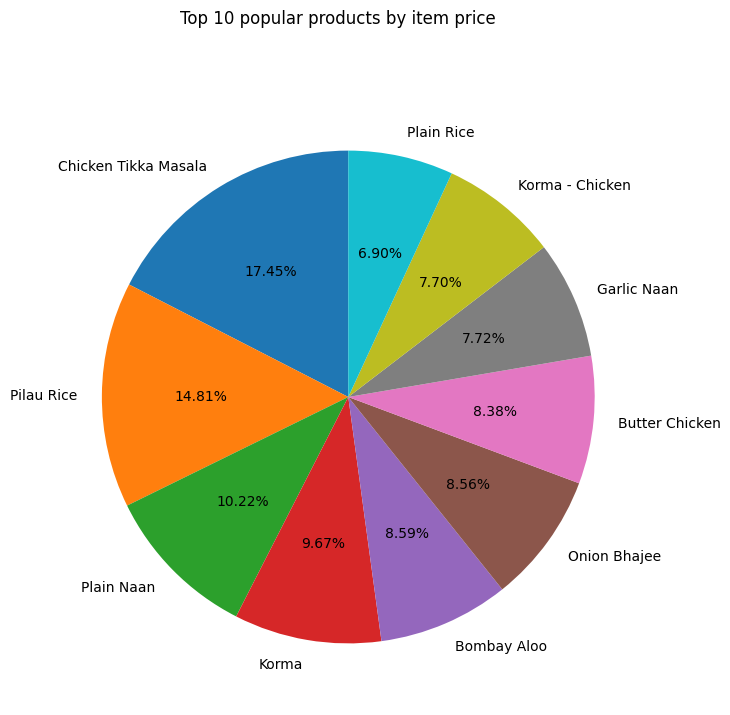

In [34]:
item_prices = data.groupby("name").agg(
    quantity=("quantity", "sum"),
    item_price=("item_price", "sum"),
).nlargest(10, "item_price").reset_index()

plt.figure(figsize=(8, 8))
plt.pie(item_prices["item_price"], labels=item_prices["name"], autopct=f"%1.2f%%", startangle=90)
plt.suptitle("Top 10 popular products by item price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

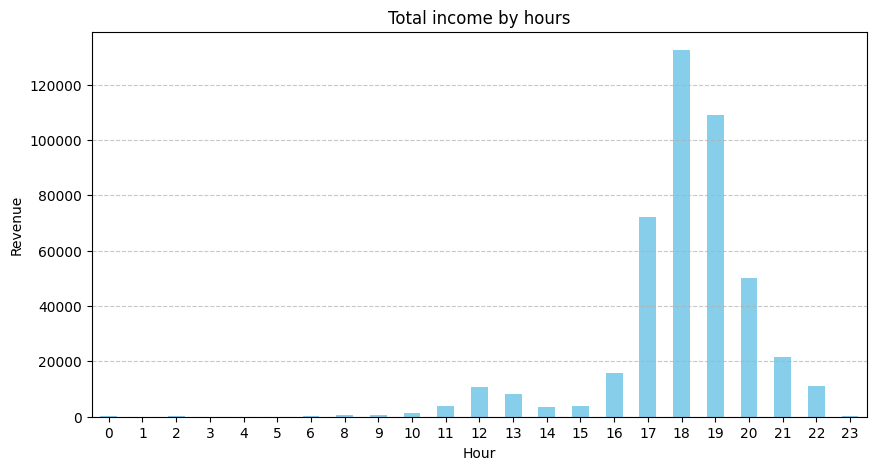

In [35]:
data["hour"] = data["datetime"].dt.hour
hourly_revenue = data.groupby("hour")["item_price"].sum()

plt.figure(figsize=(10, 5))
hourly_revenue.plot(kind="bar", color="skyblue")
plt.title("Total income by hours")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

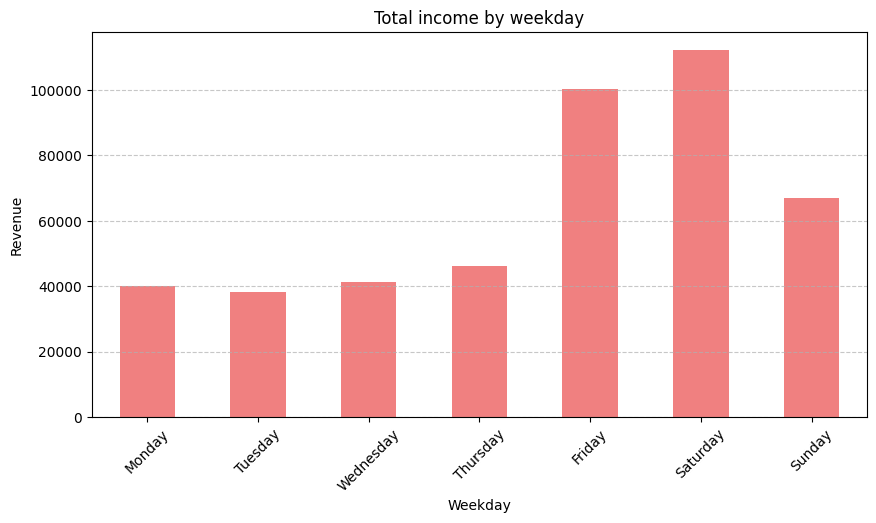

In [36]:
data["weekday"] = data["datetime"].dt.day_name()
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_revenue = data.groupby("weekday")["item_price"].sum().reindex(weekday)

plt.figure(figsize=(10, 5))
weekday_revenue.plot(kind="bar", color="lightcoral")
plt.title("Total income by weekday")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()